<a href="https://colab.research.google.com/github/ikuyumcu/Sat-na-alma-analizi/blob/main/Dimes_sat%C4%B1nalma_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

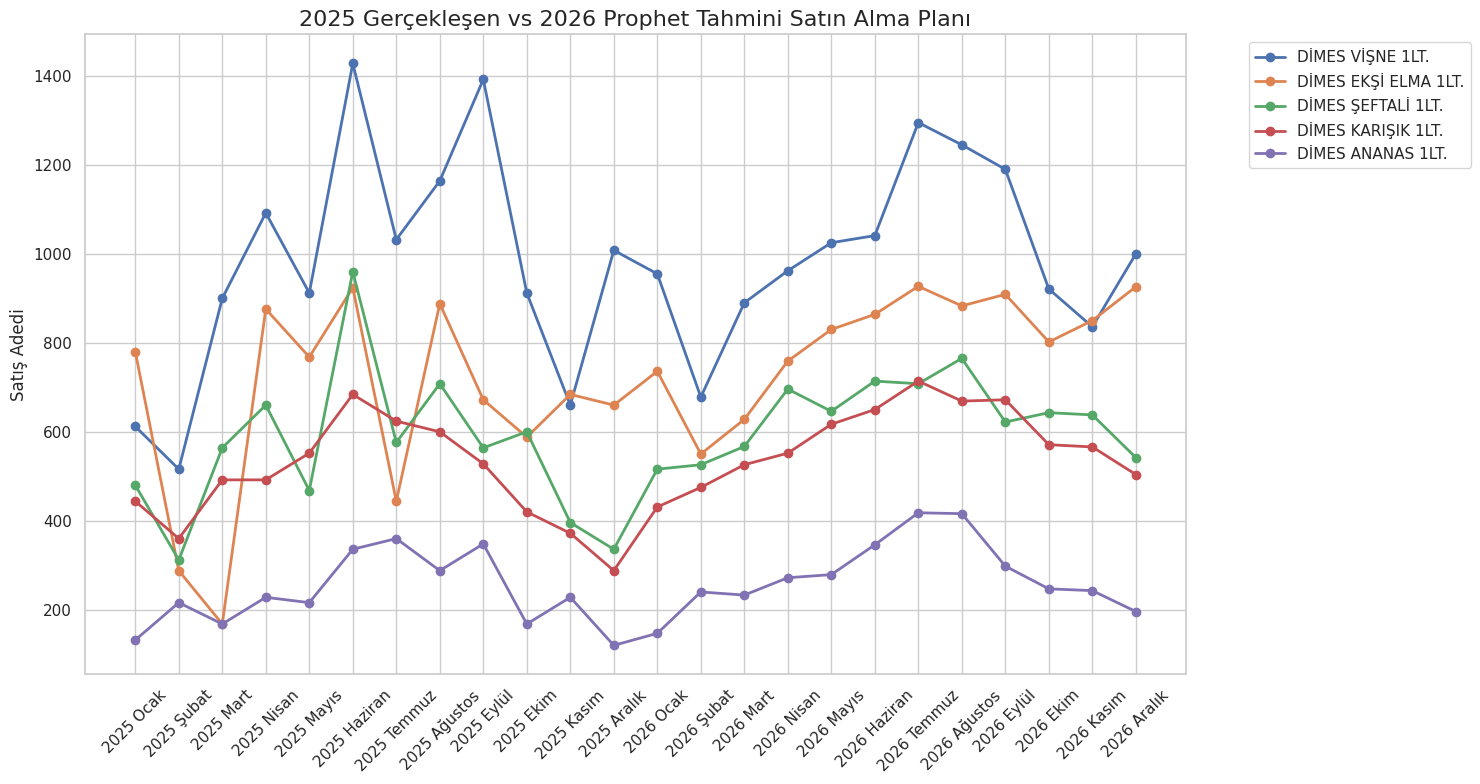


--- 2026 PROPHET TAHMİN TABLOSU ---
                      Ocak  Şubat  Mart  Nisan  Mayıs  Haziran  Temmuz  \
DİMES VİŞNE 1LT.       955    678   890    962   1025     1041    1295   
DİMES EKŞİ ELMA 1LT.   736    550   628    759    830      864     927   
DİMES ŞEFTALİ 1LT.     516    526   567    696    646      714     708   
DİMES KARIŞIK 1LT.     431    475   526    552    617      650     714   
DİMES ANANAS 1LT.      147    240   233    272    279      346     418   

                      Ağustos  Eylül  Ekim  Kasım  Aralık  
DİMES VİŞNE 1LT.         1245   1190   921    836    1000  
DİMES EKŞİ ELMA 1LT.      883    909   802    850     926  
DİMES ŞEFTALİ 1LT.        765    622   643    638     542  
DİMES KARIŞIK 1LT.        669    672   571    566     504  
DİMES ANANAS 1LT.         416    298   247    243     196  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [15, 8]

# VERİ
data = {
    'DİMES VİŞNE 1LT.': [1008, 660, 684, 864, 1044, 576, 960, 1116, 1008, 588, 564, 744, 924, 252, 636, 504, 540, 660, 1164, 924, 756, 672, 660, 720, 504, 672, 468, 708, 960, 1008, 1056, 804, 852, 900, 744, 852, 612, 516, 900, 1092, 912, 1428, 1032, 1164, 1392, 912, 660, 1008],
    'DİMES EKŞİ ELMA 1LT.': [72, 132, 372, 300, 396, 348, 228, 432, 408, 300, 216, 396, 228, 216, 276, 228, 348, 264, 672, 336, 348, 360, 408, 540, 276, 228, 132, 324, 372, 756, 948, 300, 960, 408, 804, 612, 780, 288, 168, 876, 768, 924, 444, 888, 672, 588, 684, 660],
    'DİMES ŞEFTALİ 1LT.': [108, 360, 240, 444, 504, 444, 360, 372, 252, 228, 324, 216, 168, 120, 276, 360, 252, 180, 432, 444, 300, 324, 396, 276, 324, 396, 252, 300, 396, 492, 408, 564, 420, 552, 384, 444, 480, 312, 564, 660, 468, 960, 576, 708, 564, 600, 396, 336],
    'DİMES KARIŞIK 1LT.': [96, 312, 312, 360, 432, 540, 384, 480, 432, 192, 300, 300, 192, 192, 264, 252, 312, 240, 492, 348, 360, 360, 372, 228, 312, 384, 312, 456, 468, 432, 576, 456, 696, 684, 384, 588, 444, 360, 492, 492, 552, 684, 624, 600, 528, 420, 372, 288],
    'DİMES ANANAS 1LT.': [84, 204, 168, 228, 192, 228, 216, 360, 216, 120, 36, 72, 48, 96, 132, 156, 228, 264, 420, 384, 144, 144, 240, 144, 96, 180, 228, 240, 180, 336, 372, 180, 300, 444, 132, 156, 132, 216, 168, 228, 216, 336, 360, 288, 348, 168, 228, 120]
}

forecast_2026_results = {}
start_date = "2022-01-01"

# PROPHET MODELİ
for product, sales in data.items():

    # Prophet formatı
    df_prod = pd.DataFrame({
        "ds": pd.date_range(start=start_date, periods=48, freq="MS"),
        "y": sales
    })

    model = Prophet(yearly_seasonality=True)
    model.fit(df_prod)

    # 2026 için 12 ay ileri
    future = model.make_future_dataframe(periods=12, freq="MS")
    forecast = model.predict(future)

    # Sadece 2026'yı al
    forecast_2026 = forecast.tail(12)["yhat"].values

    # %5 Güvenlik payı
    forecast_2026_results[product] = np.maximum(forecast_2026 * 1.05, 0).round().astype(int)

# GÖRSEL
month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

fig, ax = plt.subplots()

for product in data.keys():
    past_2025 = data[product][-12:]
    future_2026 = forecast_2026_results[product]

    full_series = np.concatenate([past_2025, future_2026])
    labels = [f"2025 {m}" for m in month_names] + [f"2026 {m}" for m in month_names]

    ax.plot(labels, full_series, marker='o', label=product, linewidth=2)

plt.title("2025 Gerçekleşen vs 2026 Prophet Tahmini Satın Alma Planı", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Satış Adedi")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# TABLO
df_forecast = pd.DataFrame(forecast_2026_results, index=month_names)
print("\n--- 2026 PROPHET TAHMİN TABLOSU ---")
print(df_forecast.T)
